## ilaundry

A survey of the general populace in preparation for the development of a laundry app.

In [51]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

plt.style.use('ggplot')
# plt.style.available #seaborn-whitegrid

### ilaundry Service survey analysis
A questioniare was created using google forms. Click this [link](https://docs.google.com/forms/d/e/1FAIpQLScZzRMMNLo2JU2CxGO_ERuXuzM0IMaF_U7p_iZ4iFKDxZtp_A/viewform) to view the form. This project seeks to answer the questions:
1. What service do the people need the most?
2. Which area in Abuja should marketing focus on
3. What age group use laundry service more?
4. What percentage of the population use laundry service?
5. What percentage of the population have smart phones?
6. What is is the customers opinion about the importance of the app

In [15]:
df1 = pd.read_csv('iLaundryService.csv')
# df1.head()

In [16]:
#Renaming the columns to make them easier to work with
#LSUfrequency stands for Laundry Service Usage frquency (i.e. How often do you take clothes to a laundry service)
#LSUChallenges stands for laundry service usage chalenges 
#(i.e Which of this are the challenges you go through while taking your clothes to a laundry and dry cleaning service)
#MBFbooking stands for mobile app for booking (i.e Do you think a mobile app with laundry booking service will help)
#NPickupNDelivery stands for Need pickup and Delivery (i.e Can pick up and delivery service help enhance the laundry process)
#Nlaundryapp stands for Need laundry app (i.e On a scale of 1 to 5 do you need a laundry app)
df1.columns = ['Timestamp','DOB','Occupation','State','City','Landmark','LSUfrequency','LSUChallenges','MBFbooking','NPickupNDelivery','Smartphone','Nlaundryapp']

#view the first six columns of the dataframe
# df1.head()

#### Understand the Dataset



In [40]:
#We need to know about the size of the dataset, their datatypes and check for Null(NAs) values.
print("The dataset contains {} rows and columns respectively\n".format(df1.shape))

# print("The following describes the datatype and null values in each column\n")
# df1.info()

The dataset contains (27, 15) rows and columns respectively



In [18]:
#Observe that DOB is of type object. This needs to be changed to a date time data type
df1['Timestamp']=df1['Timestamp'].astype('datetime64[ns]')
df1['DOB']=df1['DOB'].astype('datetime64[ns]')

In [39]:
# df1.info()

#### Question 1: What service do the people need the most?



In [41]:
#To answer this question, the columns **'LSUChallenges','MBFbooking','NPickupNDelivery'** have contain the data for this. 

#Handling LSUChallenges, we need a method to seperate the options into individuals rows.
challenges_class = ['Transportation cost/hold up','Access to good laundry services','Time taken to complete your laundry',
                   'Cost of laundry services','payment challenges ( prevent you from getting your clothes)',
                    'Absence of Delivery services']

len_ch_class = len(challenges_class)

#convert it to numpy array for use in loop
lsu_ch = df1['LSUChallenges'].str.replace(';',',') 

#create an array to hold process LSUChallenges data
ch_data = []
ch_desc = []

for ch in lsu_ch:
   
    #split by the delimeter ;
    ch_arr = ch.split(',')
#     print(ch_arr)
    for ch_str in ch_arr:
        
        if(ch_str in challenges_class):
            str_index = challenges_class.index(ch_str)
            ch_data.append(str_index)
            ch_desc.append(ch_str)
        else:
            challenges_class.append(ch_str)
            ch_data.append(len_ch_class)
            ch_desc.append(ch_str)
            len_ch_class = len_ch_class + 1
                
# print("The list of classes: \n \n {} \n".format(challenges_class))

#convert it to a data frame for easy usage
lsu_ch_df = pd.DataFrame({'code' : ch_data,'desc' : ch_desc})
# lsu_ch_df.head()

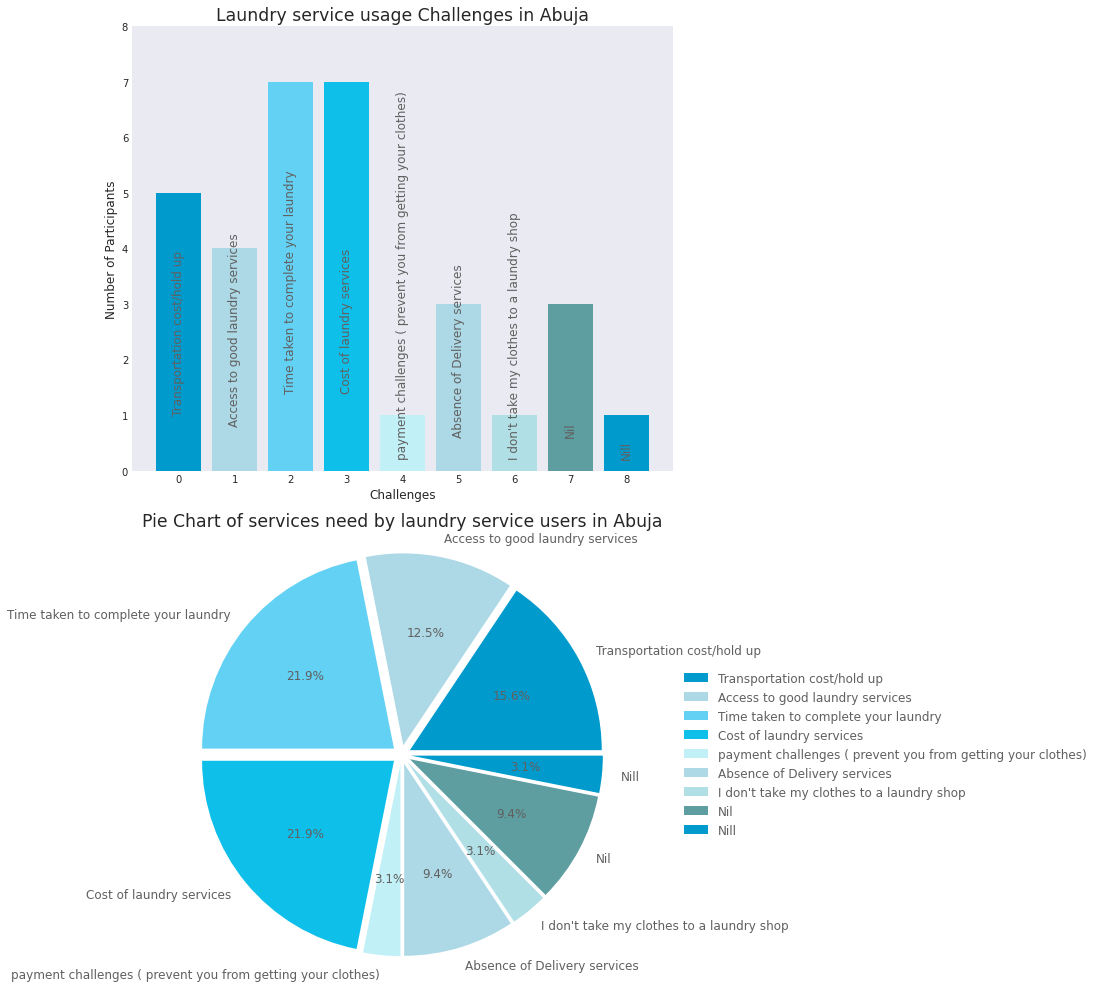

In [21]:
#prepare parameters for the visuals
# lsu_ch_df.value_counts()
freq_tab = lsu_ch_df.groupby(['code','desc']).size()

#labels for the chart
x_labels=freq_tab.index.get_level_values('desc')
x_codes=freq_tab.index.get_level_values('code')
y_size=freq_tab.values
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                     '#C1F0F6', '#ADD8E6','#B0E0E6','#5F9EA0']

with plt.style.context('seaborn-dark'):
    fig, (ax,ax1) = plt.subplots(2,1,figsize=(14,14))

    #set plt styles
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#606060'
    plt.rcParams['axes.labelcolor']= '#606060'
    plt.rcParams['xtick.color'] = '#606060'
    plt.rcParams['ytick.color'] = '#606060'
    plt.rcParams['font.size']=12

    bars1 = ax.bar(x_codes, y_size,
            color=color_palette_list,       
            tick_label=x_codes)

    def autolabel(rects):
        for idx,rect in enumerate(rects):
            height=rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2,0.2*height, x_labels[idx],ha='center',va='bottom',rotation=90)

    autolabel(bars1)        
    ax.set_title("Laundry service usage Challenges in Abuja")
    ax.set_ylabel("Number of Participants")
    ax.set_ylim((0,8))
    ax.set_xlabel("Challenges")
    
    ax1.pie(y_size, explode=explode, labels=x_labels,  
       colors=color_palette_list, autopct='%1.1f%%', 
       shadow=False, startangle=0)
    ax1.axis('equal')
    ax1.set_title("Pie Chart of services need by laundry service users in Abuja")
    ax1.legend(frameon=False, bbox_to_anchor=(1,0,0.5,1), loc='center left')

plt.tight_layout()
plt.show()

Time take to complete laundry and cost of laundry services followed by transportation cost are 3 significant problems hindering people from taking their clothes to a dry cleaning shop. 

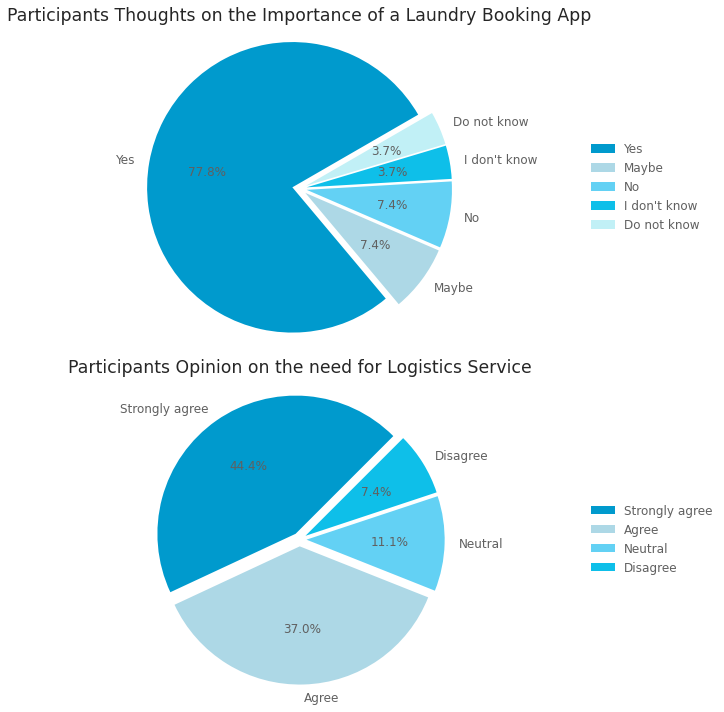

In [22]:
#plotting a pie chat of the number of people that need a laundry app for booking.
freq_booking=df1['MBFbooking'].value_counts()
freq_logistics=df1['NPickupNDelivery'].value_counts()

#labels for the chart
x_labels1=freq_booking.index.values
x_labels2=freq_logistics.index.values
y_size1=freq_booking.values
y_size2=freq_logistics.values
explode1 = tuple([0.05 for i in range(0,len(y_size1))])
explode2 = tuple([0.05 for i in range(0,len(y_size2))])

with plt.style.context('seaborn-dark'):
    fig, (ax,ax1) = plt.subplots(2,1,figsize=(10,10))

    #set plt styles
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#606060'
    plt.rcParams['axes.labelcolor']= '#606060'
    plt.rcParams['xtick.color'] = '#606060'
    plt.rcParams['ytick.color'] = '#606060'
    plt.rcParams['font.size']=12

    ax.pie(y_size1, explode=explode1, labels=x_labels1,  
       colors=color_palette_list, autopct='%1.1f%%', 
       shadow=False, startangle=30)
    ax.axis('equal')
    ax.set_title("Participants Thoughts on the Importance of a Laundry Booking App")
    ax.legend(frameon=False, bbox_to_anchor=(1,0,0.5,1), loc='center left')
    
    ax1.pie(y_size2, explode=explode2, labels=x_labels2,  
       colors=color_palette_list, autopct='%1.1f%%', 
       shadow=False, startangle=45)
    ax1.axis('equal')
    ax1.set_title("Participants Opinion on the need for Logistics Service")
    ax1.legend(frameon=False, bbox_to_anchor=(1,0,0.5,1), loc='center left')

plt.tight_layout()
plt.show()

77.8% of the participant are of the opinion that a laundry booking app is important. 44.4% and 37% (a total of 81.4%) Strongly agree and agree respectively that logistics service will help.

#### Question 2: Which area in Abuja should marketing focus on?

In [42]:
#This information can be obtained from **Landmark** and **LSUfrequency** column

#Create a list of all possible areas in abuja
area = [x.upper() for x in ['gudu','iddo','apo','lugbe','garki','karu','wuse','wuse 2','maitama','asokoro',
                            'utako','Gwagwalada','Durumi','guzapa','Lokogoma']]

def find_area(my_str,area_arr):
    for a in area_arr:
        if a in my_str.upper():
            return a
    return  None

from datetime import date

def cal_age(dob):
    today = date.today()
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

#add new cloumn area    
df1['area'] = df1['Landmark'].apply(find_area, args=(area,))
df1['age']= df1['DOB'].apply(cal_age)

#age range column
bins = [0,20,30,40,50,60,70,120]
labels = ['0-20','20-29','30-39','40-49','50-59','60-69','70+']
df1['agerange'] = pd.cut(df1.age, bins, labels=labels, include_lowest=True)

In [43]:
df2=df1[['Landmark','LSUfrequency','area','age','agerange']]
# df2.head()

In [44]:
freq_table=df2.groupby(['area','LSUfrequency']).size()
# freq_table

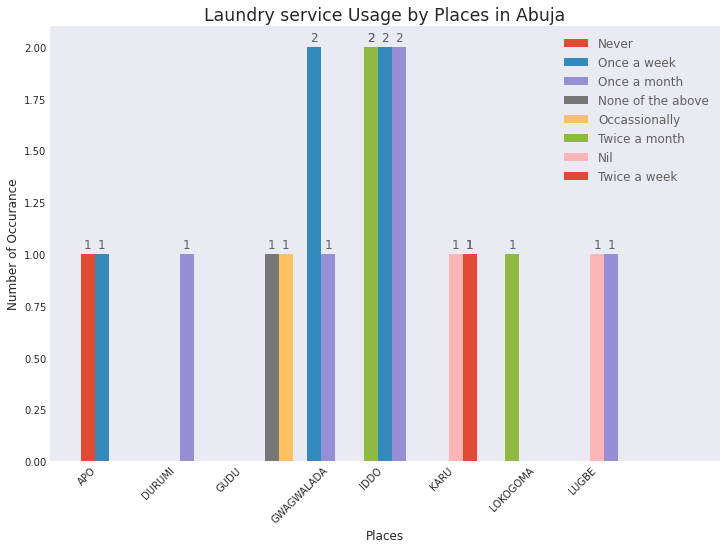

In [26]:
#Ploting

#labels for the chart
x_labels=freq_table.index.get_level_values('area').unique()
labels=freq_table.index.get_level_values('LSUfrequency').unique()
y=[]

for a in x_labels:
    a_freq = dict(freq_table[a])
    row_data = [a_freq[key] if key in a_freq else 0  for key in labels]
    y.append(row_data)

y_data =np.array(y)
x = np.arange(len(x_labels))  # the label locations
width = 0.2  # the width of the bars    

with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(figsize=(12, 8))

    #set plt styles
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#606060'
    plt.rcParams['axes.labelcolor']= '#606060'
    plt.rcParams['xtick.color'] = '#606060'
    plt.rcParams['ytick.color'] = '#606060'
    plt.rcParams['font.size']=12
    bars = [None for i in range(len(labels))]
    for i,a in enumerate(labels):
        bars[i] = ax.bar(x+width*i, y_data[:,i], width, label = a)
    
    ax.set_title("Laundry service Usage by Places in Abuja")
    ax.set_ylabel("Number of Occurance")
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, rotation=45)
    ax.set_xlabel("Places")
    ax.legend()
    
    def autolabel(rects):
        for idx,rect in enumerate(rects):
            height=rect.get_height()
            if(height):
                ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    for i in range(len(labels)):
        autolabel(bars[i])        

In [27]:
freq1=df2['area'].value_counts()
freq1

IDDO          8
GWAGWALADA    5
APO           2
KARU          2
GUDU          2
LOKOGOMA      1
LUGBE         1
DURUMI        1
Name: area, dtype: int64

This data is relatively very small to make a significant conclusion. The number of participants from each location is uneven so it is difficult to identify locations with more potential customers.

#### Question 3: What age group use laundry service more?

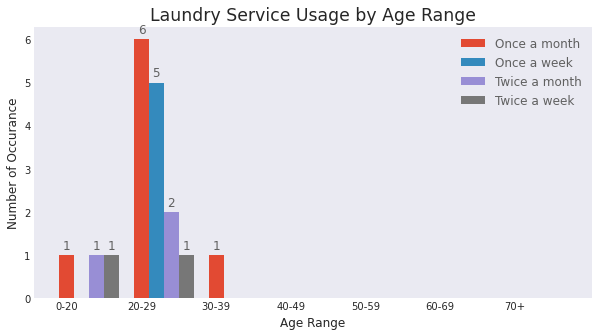

In [28]:
#Ploting a pie chart on laundry service usage by age group
df3 = df2[df2['LSUfrequency'].isin(['Once a month','Once a week','Twice a month','Twice a week'])]
freq2=df3.groupby(['agerange','LSUfrequency']).size()

#labels for the chart
x_labels=freq2.index.get_level_values('agerange').unique()
labels=freq2.index.get_level_values('LSUfrequency').unique()
y=[]

for a in x_labels:
    a_freq = dict(freq2[a])
    row_data = [a_freq[key] if key in a_freq else 0  for key in labels]
    y.append(row_data)

y_data =np.array(y)


x = np.arange(len(x_labels))  # the label locations
width = 0.2  # the width of the bars 
width_incr = np.arange(0.0, len(labels)*width,width)


with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(figsize=(10, 5))

    #set plt styles
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#606060'
    plt.rcParams['axes.labelcolor']= '#606060'
    plt.rcParams['xtick.color'] = '#606060'
    plt.rcParams['ytick.color'] = '#606060'
    plt.rcParams['font.size']=12
    bars = [None for i in range(len(labels))]
    for i,a in enumerate(labels):
        bars[i] = ax.bar(x+width_incr[i], y_data[:,i], width=width, label = a)
    
    ax.set_title("Laundry Service Usage by Age Range")
    ax.set_ylabel("Number of Occurance")
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    ax.set_xlabel("Age Range")
    ax.legend()
    
    def autolabel(rects):
        for idx,rect in enumerate(rects):
            height=rect.get_height()
            if(height):
                ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    for i in range(len(labels)):
        autolabel(bars[i])        

The bar plot shows that customers between 20-29 use dry cleaning services more. However, This cannot be accepted because the various age groups are not fully represented. More data need to be collected for meaningful information to be obtained.

### Question 4: What percentage of the population use laundry service?

In [47]:
freq3=df1['LSUfrequency'].value_counts()
# freq3

In [30]:
percentage = (freq3.filter(items=['Once a month','Once a week','Twice a month','Twice a week'], axis=0).sum()/freq3.sum())*100
print("The percentage of participants that use laundry services is %.2f" % (percentage))

The percentage of participants that use laundry services is 66.67


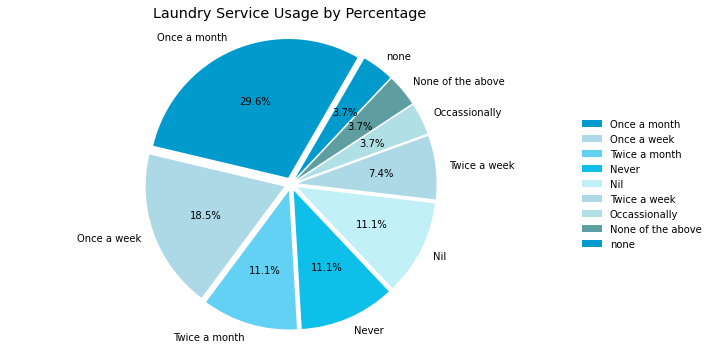

In [31]:
#plot the pie chart
fig, ax = plt.subplots(figsize=(10, 5))
explode = tuple([0.05 for i in range(0,len(freq3))])
ax.pie(freq3.values, explode=explode, labels=freq3.index.values,  
       colors=color_palette_list, autopct='%1.1f%%', 
       shadow=False, startangle=60)
ax.axis('equal')
ax.set_title("Laundry Service Usage by Percentage")
ax.legend(frameon=False, bbox_to_anchor=(1,0,0.5,1), loc='center left')
    
    
plt.tight_layout()
plt.show()

We observe that more than 60% of the population take their laundry to a dry cleaning shop and taking laundry to a dry cleaner once a month is most common.

#### Question 5: What percentage of the population(participants) have smart phones?



In [45]:
#This information is available in **Smartphone** column
df4 = df1[['agerange','Smartphone']]
# df4.head()

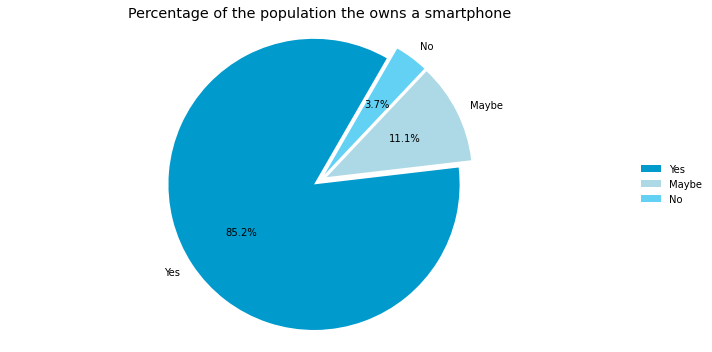

In [46]:
freq4 = df4['Smartphone'].value_counts()
# print(freq4)
#plot the pie chart
fig, ax = plt.subplots(figsize=(10, 5))
explode = tuple([0.05 for i in range(0,len(freq4))])
ax.pie(freq4.values, explode=explode, labels=freq4.index.values,  
       colors=color_palette_list, autopct='%1.1f%%', 
       shadow=False, startangle=60)
ax.axis('equal')
ax.set_title("Percentage of the population the owns a smartphone")
ax.legend(frameon=False, bbox_to_anchor=(1,0,0.5,1), loc='center left')
    
    
plt.tight_layout()
plt.show()

82% of the participants in the survey have smartphones. The data is too small to be a representation of the populaion. More data is needed for conclusiveness.

In [34]:
freq5 = df4.groupby(['agerange','Smartphone']).size()
print(freq5)

agerange  Smartphone
0-20      Maybe          1
          No             0
          Yes            3
20-29     Maybe          2
          No             1
          Yes           18
30-39     Maybe          0
          No             0
          Yes            2
40-49     Maybe          0
          No             0
          Yes            0
50-59     Maybe          0
          No             0
          Yes            0
60-69     Maybe          0
          No             0
          Yes            0
70+       Maybe          0
          No             0
          Yes            0
dtype: int64


#### Question 6: What is the customers opinion about the importance of the app?

In [49]:
freq6 = df1['Nlaundryapp'].value_counts()
# freq6

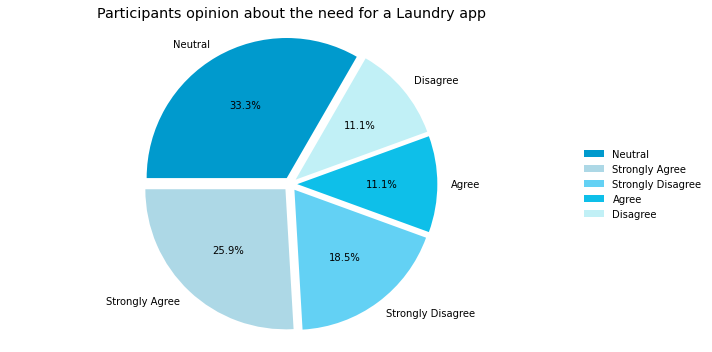

In [36]:
labels = pd.Series(data={1:'Strongly Disagree',2:'Disagree',3:'Neutral',4:'Agree',5:'Strongly Agree'})

#plot the pie chart
fig, ax = plt.subplots(figsize=(10, 5))
explode = tuple([0.05 for i in range(0,len(freq6))])
ax.pie(freq6.values, explode=explode, labels=labels.loc[freq6.index.values],  
       colors=color_palette_list, autopct='%1.1f%%', 
       shadow=False, startangle=60)
ax.axis('equal')
ax.set_title("Participants opinion about the need for a Laundry app")
ax.legend(frameon=False, bbox_to_anchor=(1,0,0.5,1), loc='center left')
    
    
plt.tight_layout()
plt.show()

We observe that an overall of 37% of the participants agree that a laundry app is needed. Of these, 25.9% strongly agree while 11.1% agree. On the other hand, 33.3% of the participants are neutral while 18.5% and 11.1% strongly disagree and disagree respectively. This tells us that the importance of the laundry app is not very clear to people.

**Recommendation** 

1. It is recommended that the development of the mobile laundry app continues. When ready, proper marketting through to the right customers will ensure success.
2. It is recommended that cable TV, radios, billboard,magazines and social media be used to reach the right market. Using fliers may be futile as the target customers hardly have time to collect flier in the street.
3. Laundry booking service is very important.
4. Logistics services may be needed but it depends on the initial laundry businesses we work with.


In [52]:
import os
os.system('jupyter nbconvert --to html ilaundryservice.ipynb')

0